# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse metada head 
mouse_metadata.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [3]:
#study results 
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')
# Display the data table for preview
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [5]:
# Checking the number of mice.
total_number_mice_df= merged_df['Mouse ID']. nunique ()
print("Number of Mice:", total_number_mice_df)


Number of Mice: 249


In [6]:
#how many lines of mice are there 
mice_total = len(merged_df)
mice_total

1893

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()[0]
duplicate

'g989'

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_df[merged_df["Mouse ID"]==duplicate]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df["Mouse ID"]!=duplicate]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [10]:
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [11]:
# Checking the number of mice in the clean DataFrame.
total_number_mice_df= clean_df['Mouse ID']. nunique ()
print("Number of Mice:", total_number_mice_df)

Number of Mice: 248


## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
means = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
medians = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
st_deviations = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
SEMS = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

stats = pd.DataFrame({"mean": means, "median": medians, "var": variance, "std": st_deviations, "sem": SEMS})
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
stats.round(2)

C:\Users\jacqu\AppData\Local\Temp\ipykernel_17528\2617840277.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
C:\Users\jacqu\AppData\Local\Temp\ipykernel_17528\2617840277.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
C:\Users\jacqu\AppData\Local\Temp\ipykernel_17528\2617840277.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_mice_per_regimen = pd.DataFrame(pd.value_counts(merged_df["Drug Regimen"]))
total_mice_per_regimen

,Drug Regimen
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Stelasyn,181
Placebo,181
Infubinol,178
Ceftamin,178
Propriva,161


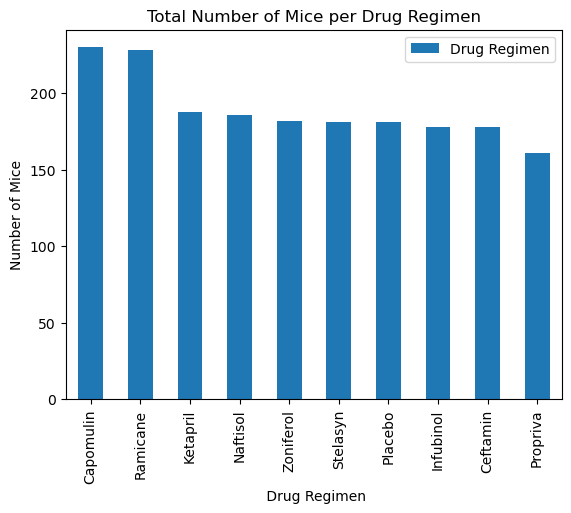

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot
pd_bar_mice_per_regimen = total_mice_per_regimen.plot(kind='bar', width=.5)
plt.xlabel(" Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Total Number of Mice per Drug Regimen")
plt.show()

In [18]:
#find out how many females and males are in the data 
mice_gender = clean_df.groupby('Sex')['Sex'].count()
mice_gender

Sex
Female    922
Male      958
Name: Sex, dtype: int64

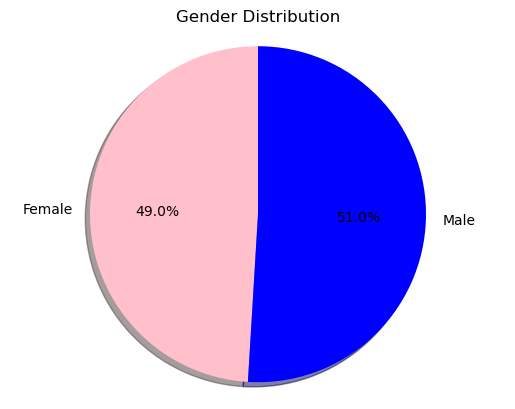

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using Pyplot
#set variables 
sex = mice_gender.index
colors = ["pink", "blue"]


#do pie chart 
plt.title("Gender Distribution")
plt.pie(mice_gender, labels=mice_gender.index, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()
plt.close()

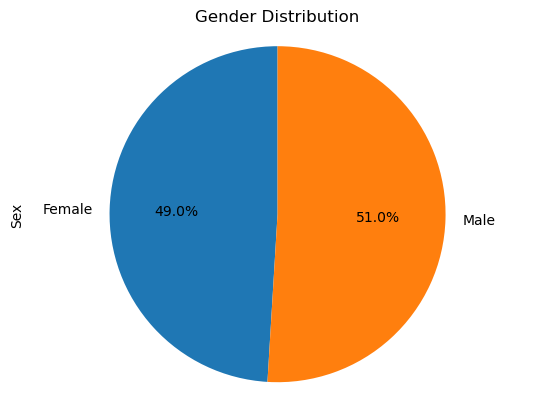

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pd_pie_gender_sex = mice_gender.plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.axis('equal')

pd_pie_gender_sex.set_title(label='Gender Distribution')
pd_pie_gender_sex.set_ylabel('Sex')
plt.show()
plt.close()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomul in, Ramicane, Infubinol, and Ceftamin
final_max = clean_df.groupby("Mouse ID").max()["Timepoint"]
final_max = final_max.reset_index()

final_merge_df = pd.merge(final_max, clean_df, on=["Mouse ID","Timepoint"], how="left")

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [45]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in regimens:
    v = final_merge_df.loc[final_merge_df["Drug Regimen"] == x, "Tumor Volume (mm3)"]
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    vol.append(v)
    
    # Determine outliers using upper and lower bounds
    quartiles = v.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean =v.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    #outliers 
    outliers = v.loc[(v < lower_bound) | (v > upper_bound)]
    
    #print results 
    print(f"{x} Regimen")
    print(f"Final tumor Volume for {x} below {round(lower_bound,2)} could be outliers.")
    print(f"Final tumor Volume for {x} above {round(upper_bound,2)} could be outliers.")
    print(f"Average tumor volume for {x} is: {round(mean,2)}")
    print(f"number of outliers for Capomulin is: {outliers.count()}")
    print('------------------------------------------------------')

Capomulin Regimen
Final tumor Volume for Capomulin below 20.7 could be outliers.
Final tumor Volume for Capomulin above 51.83 could be outliers.
Average tumor volume for Capomulin is: 36.67
number of outliers for Capomulin is: 0
------------------------------------------------------
Ramicane Regimen
Final tumor Volume for Ramicane below 17.91 could be outliers.
Final tumor Volume for Ramicane above 54.31 could be outliers.
Average tumor volume for Ramicane is: 36.19
number of outliers for Capomulin is: 0
------------------------------------------------------
Infubinol Regimen
Final tumor Volume for Infubinol below 36.83 could be outliers.
Final tumor Volume for Infubinol above 82.74 could be outliers.
Average tumor volume for Infubinol is: 58.18
number of outliers for Capomulin is: 1
------------------------------------------------------
Ceftamin Regimen
Final tumor Volume for Ceftamin below 25.36 could be outliers.
Final tumor Volume for Ceftamin above 87.67 could be outliers.
Average

{'whiskers': [<matplotlib.lines.Line2D at 0x19df3e8b190>,
 'caps': [<matplotlib.lines.Line2D at 0x19df3e11f30>,
 'boxes': [<matplotlib.lines.Line2D at 0x19df3e8b4c0>,
 'medians': [<matplotlib.lines.Line2D at 0x19df3ead6c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x19df3eae920>,
 'means': []}

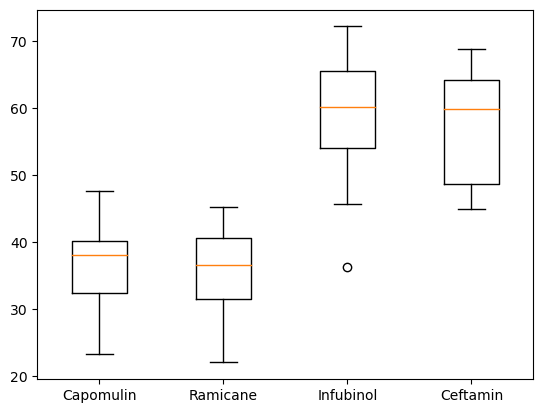

In [31]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(vol,labels=regimens)

## Line and Scatter Plots

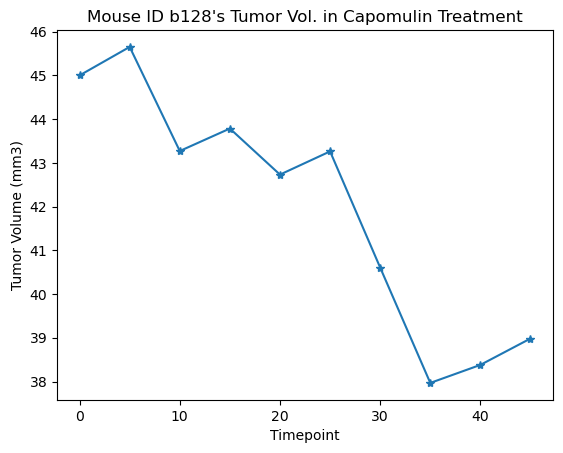

In [59]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

#get mouse ID and data 
mouse_id = 'b128'
mouse_df = capomulin_df.loc[capomulin_df['Mouse ID'] == mouse_id]

#line plot 
timepoint_tumor_volume = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker='*')
plt.title(f"Mouse ID {mouse_id}'s Tumor Vol. in Capomulin Treatment")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
plt.close()

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
